In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


problem statement give the feautures we need to predict if the passengers are survive or not

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

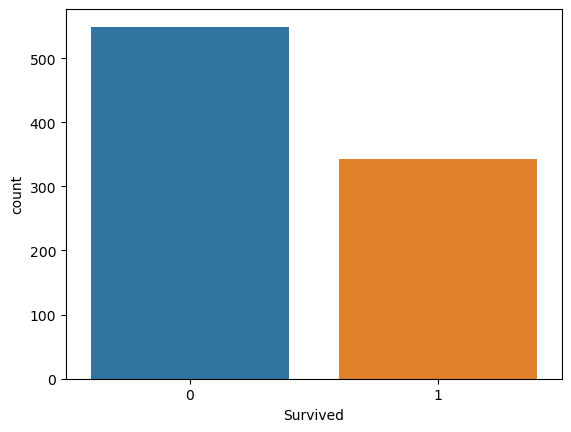

In [6]:
sns.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

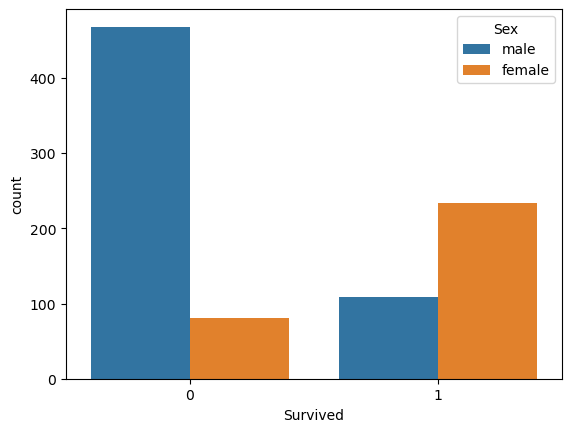

In [7]:
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

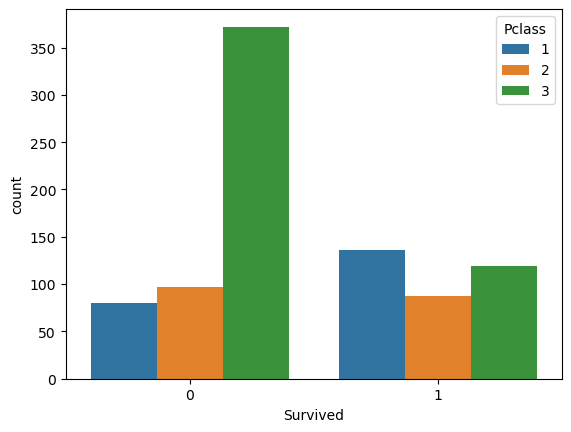

In [8]:
sns.countplot(data=df,x='Survived',hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

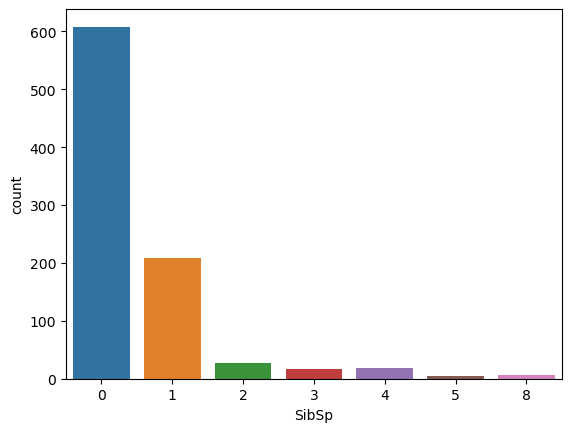

In [9]:
sns.countplot(data=df,x='SibSp')

<AxesSubplot:xlabel='Parch', ylabel='count'>

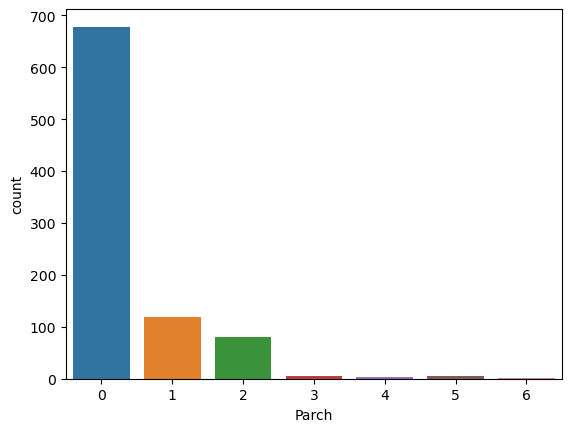

In [10]:
sns.countplot(data=df,x='Parch')

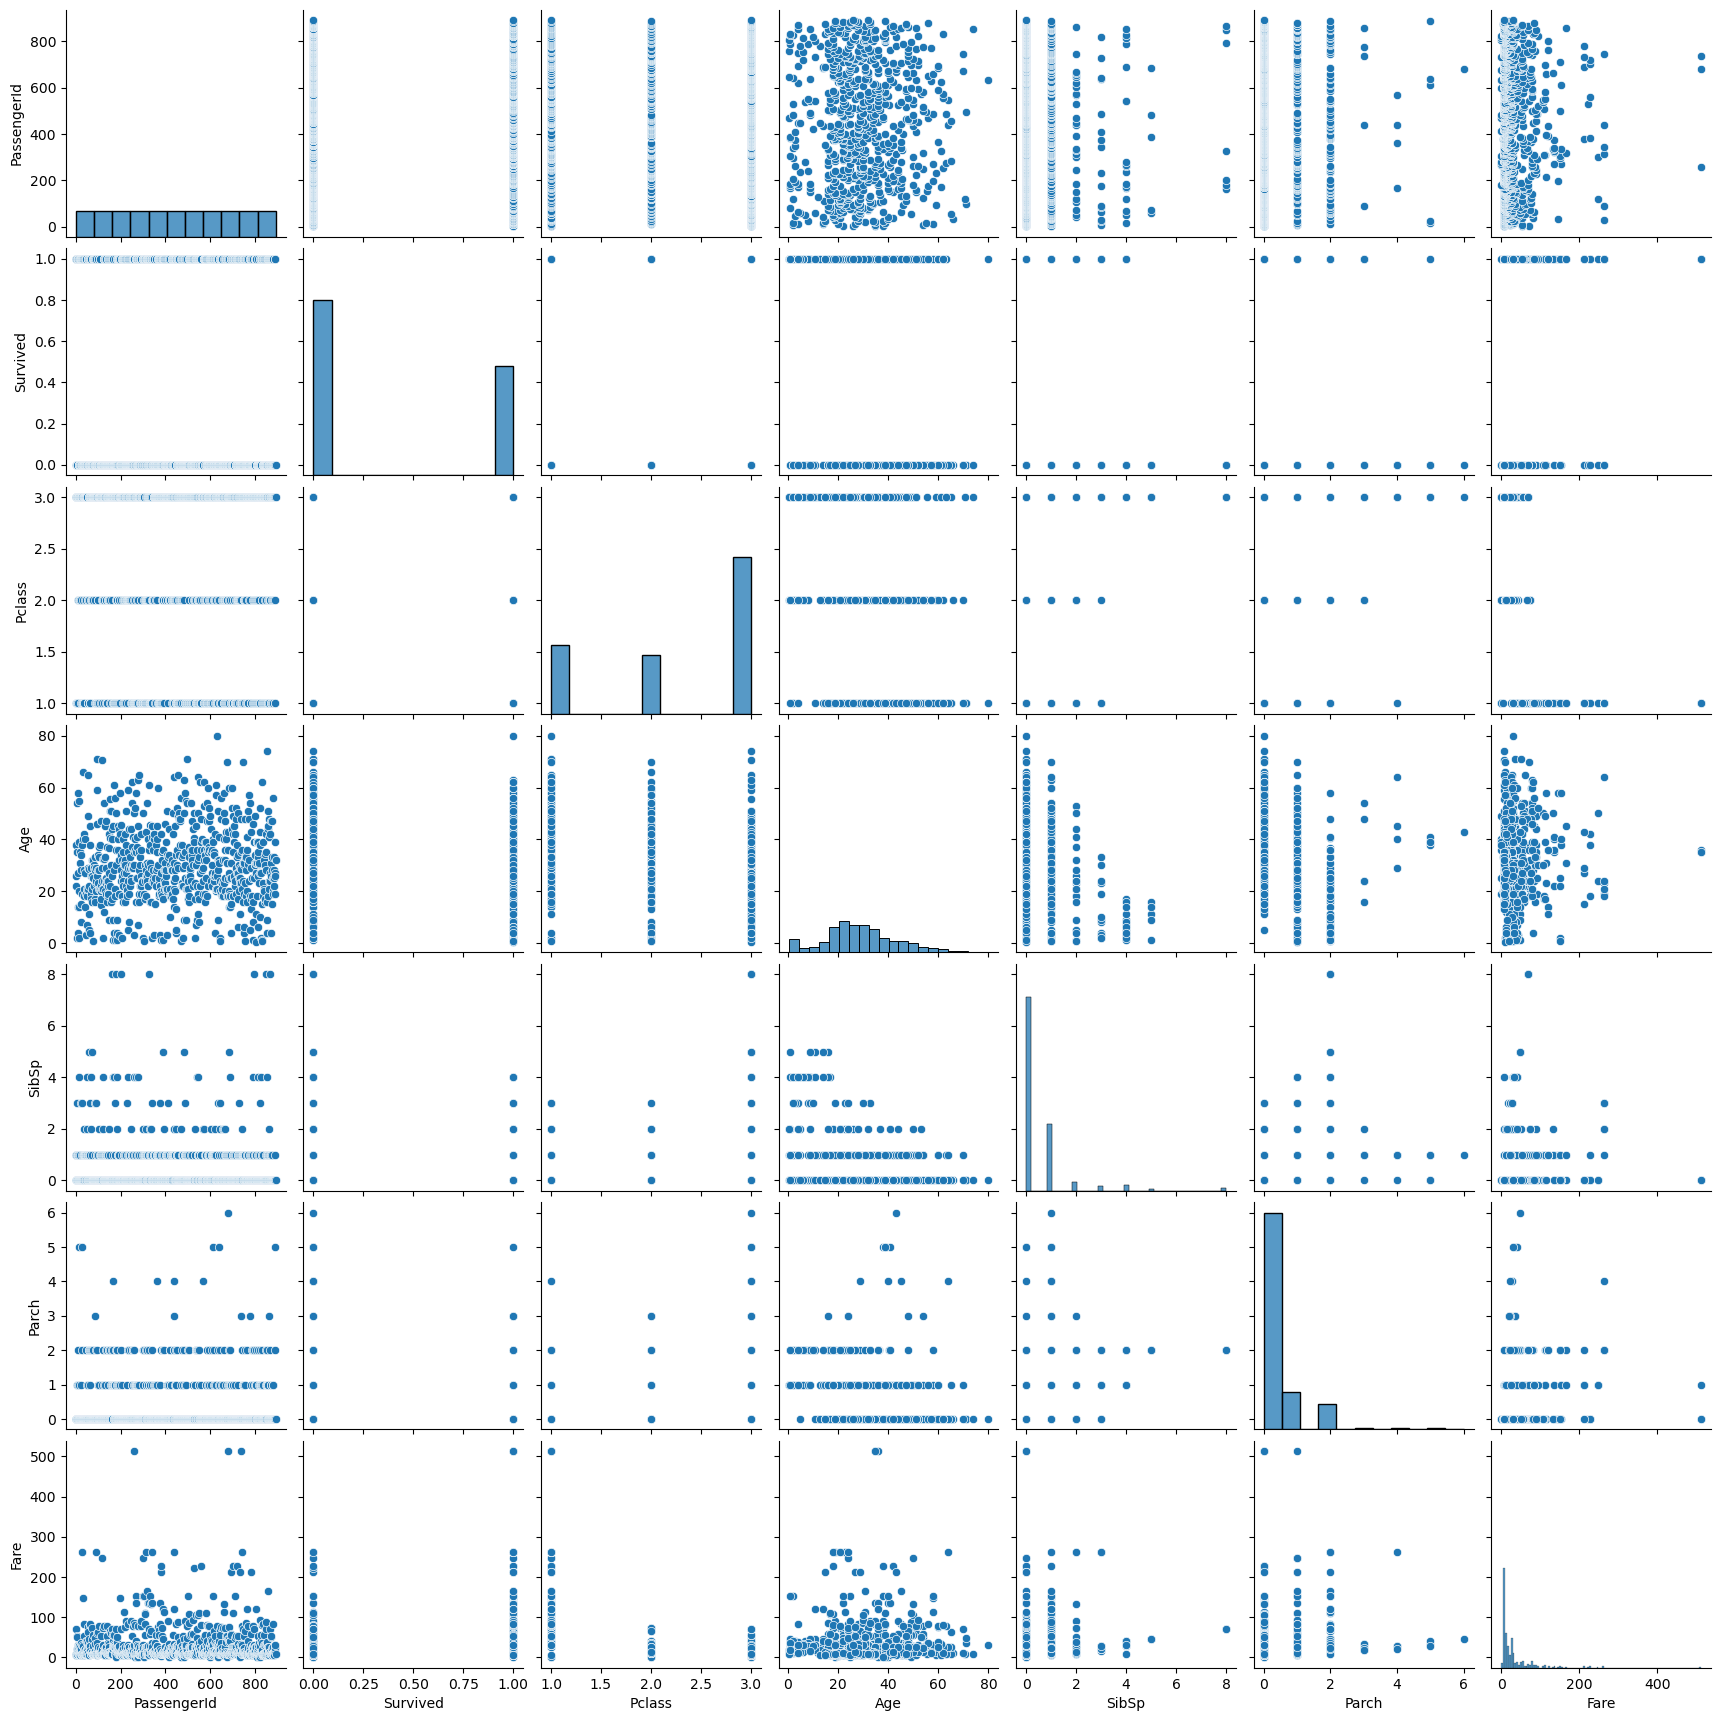

In [11]:
sns.pairplot(df)

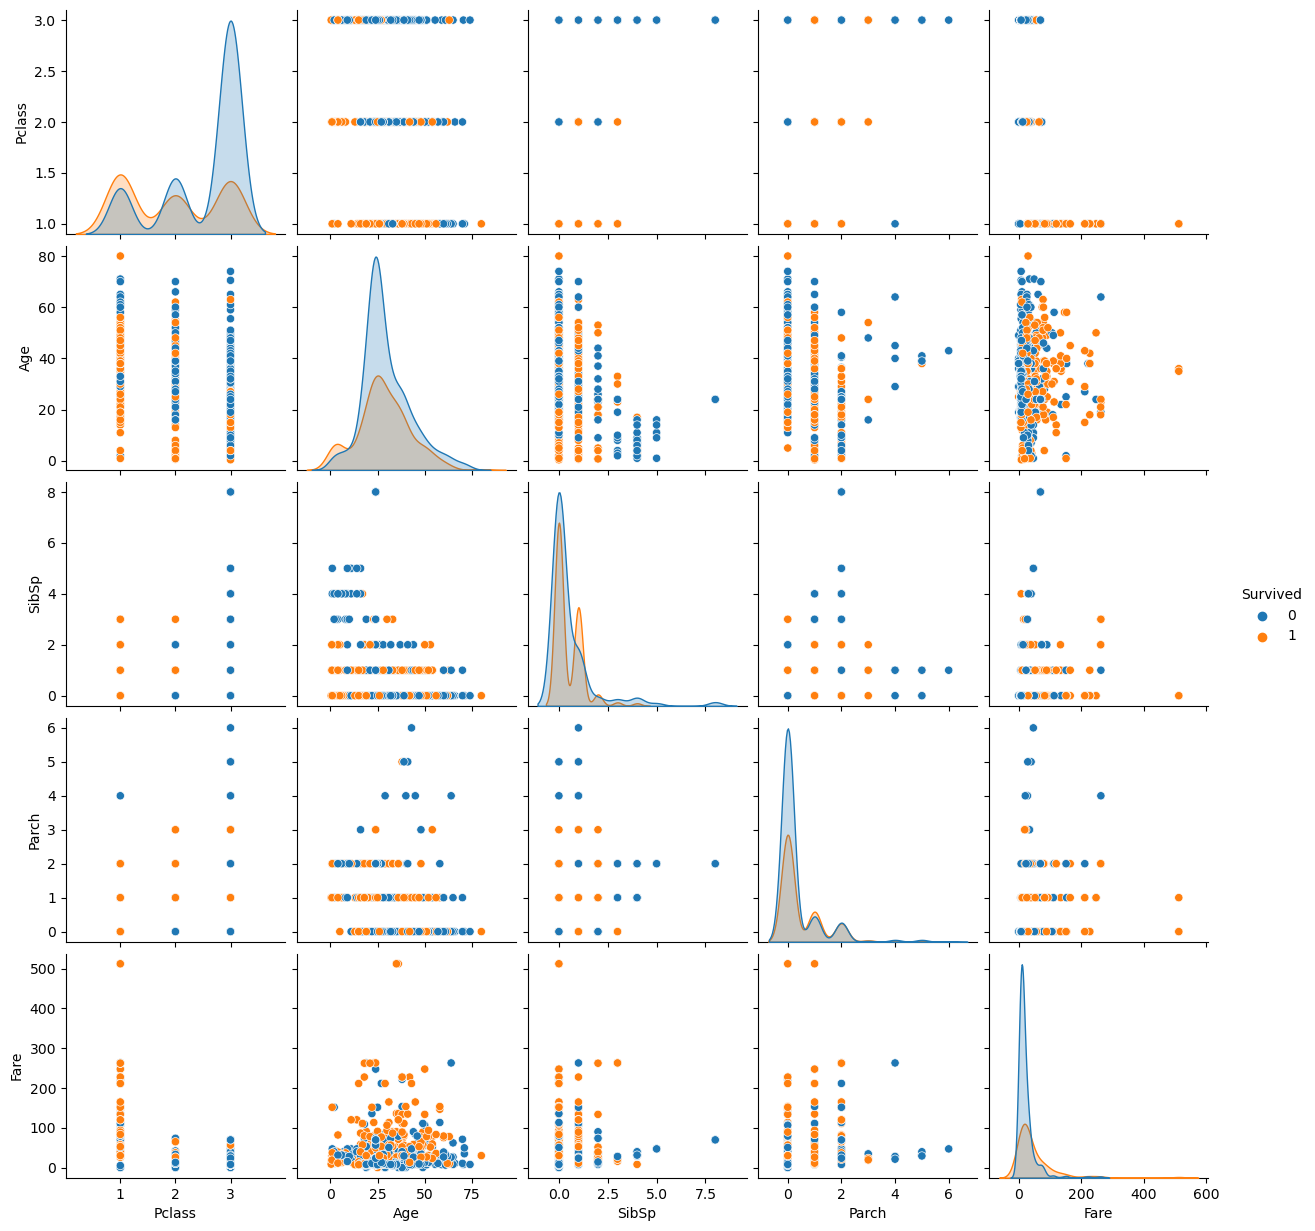

In [38]:
sns.pairplot(df,hue='Survived')

# data clenaing and preproccesing

<AxesSubplot:>

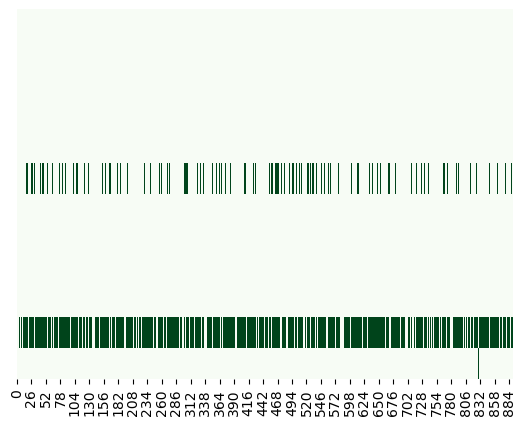

In [12]:
sns.heatmap(df.isnull().T,yticklabels=False,cbar=False,cmap='Greens')

In [13]:
#Rule
# if the missing value<3%  dropna
# if the missing value 3  -50% fillna
# if the missing value is above50%drop
#    1)Age=177/891=19%
#    2)Cabin=687/891=77%
 #   3)Embarked=2/891=0.002%(dropna)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


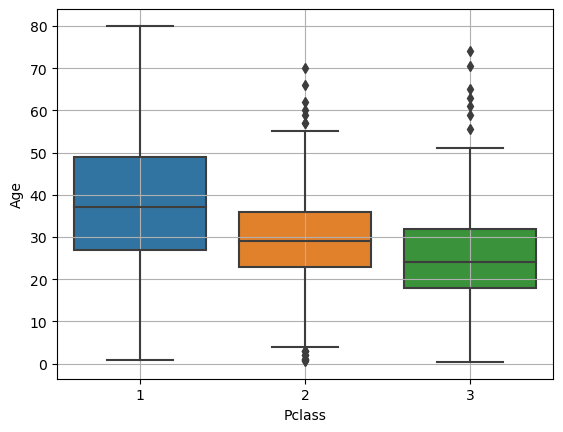

In [15]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.grid()

In [16]:
def fillage(cols):
    age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(age)):
        if(Pclass==1):
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24  
    else:
        return age
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

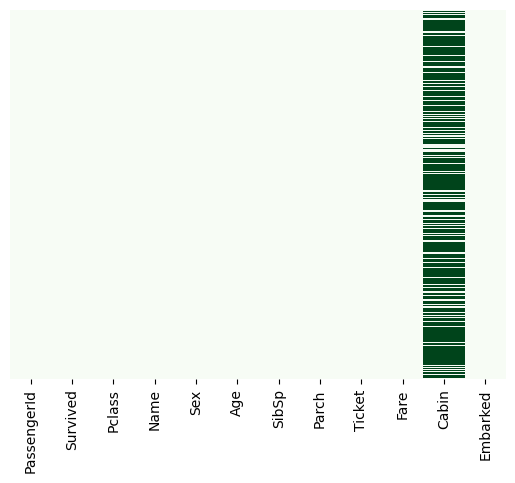

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')

In [19]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

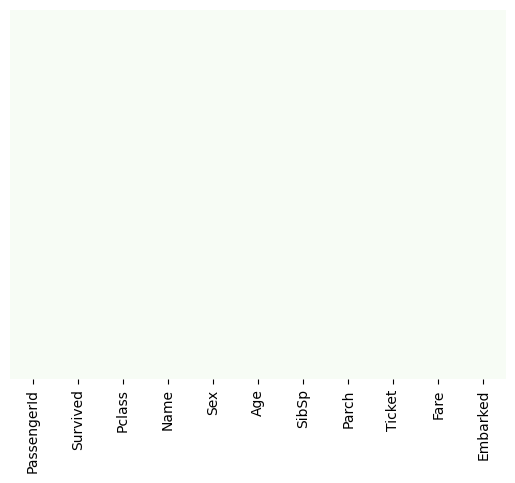

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Greens")

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [26]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [27]:
x.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [28]:
x.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[['Sex','Embarked']]=oe.fit_transform(x[['Sex','Embarked']])

In [30]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,24.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [46]:
from sklearn. linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)


LogisticRegression()

In [47]:
ypred=lg.predict(xtest)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f'accuracy score:{ac}\n classification report{cr} confusion matrix{cm}')

accuracy score:0.848314606741573
 classification report              precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.81      0.82      0.82        73

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178
 confusion matrix[[91 14]
 [13 60]]


In [49]:
train=lg.score(xtrain,ytrain)
test=lg.score(xtest,ytest)

In [50]:
train

0.7988748241912799

In [51]:
test

0.848314606741573

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [53]:
from sklearn. linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)


LogisticRegression()

In [54]:
ypred=lg.predict(xtest)

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f'accuracy score:{ac}\n classification report{cr} confusion matrix{cm}')

accuracy score:0.8089887640449438
 classification report              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178
 confusion matrix[[93 17]
 [17 51]]


In [56]:
train=lg.score(xtrain,ytrain)
test=lg.score(xtest,ytest)

In [57]:
train

0.8045007032348804

In [58]:
test

0.8089887640449438

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [86]:
ypred=knn.predict(xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
a=accuracy_score(ytest,ypred)
cl=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f'Accuracy:{a}\n confusion_matrix {cm} classification {cl}')

Accuracy:0.7528089887640449
 confusion_matrix [[86 24]
 [20 48]] classification               precision    recall  f1-score   support

           0       0.81      0.78      0.80       110
           1       0.67      0.71      0.69        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178



In [78]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    print(f'{i} training data:{train}  testingdata:{test}')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

1 training data:0.980309423347398  testingdata:0.7584269662921348
2 training data:0.8270042194092827  testingdata:0.7528089887640449
3 training data:0.8312236286919831  testingdata:0.7584269662921348
4 training data:0.7890295358649789  testingdata:0.7640449438202247


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

5 training data:0.7791842475386779  testingdata:0.7528089887640449
6 training data:0.7609001406469761  testingdata:0.7359550561797753
7 training data:0.7679324894514767  testingdata:0.6966292134831461
8 training data:0.7510548523206751  testingdata:0.7191011235955056


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

9 training data:0.749648382559775  testingdata:0.7303370786516854
10 training data:0.7454289732770746  testingdata:0.7191011235955056
11 training data:0.7412095639943741  testingdata:0.7191011235955056
12 training data:0.7355836849507735  testingdata:0.7303370786516854


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

13 training data:0.7355836849507735  testingdata:0.7303370786516854
14 training data:0.7369901547116737  testingdata:0.7359550561797753
15 training data:0.7482419127988749  testingdata:0.7359550561797753
16 training data:0.7355836849507735  testingdata:0.7303370786516854


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

17 training data:0.7383966244725738  testingdata:0.7528089887640449
18 training data:0.7327707454289732  testingdata:0.7359550561797753
19 training data:0.7313642756680732  testingdata:0.7247191011235955
20 training data:0.7341772151898734  testingdata:0.7415730337078652


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

21 training data:0.7369901547116737  testingdata:0.7415730337078652
22 training data:0.7257383966244726  testingdata:0.7134831460674157
23 training data:0.729957805907173  testingdata:0.7303370786516854
24 training data:0.7229254571026723  testingdata:0.7303370786516854


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

25 training data:0.7243319268635724  testingdata:0.7303370786516854
26 training data:0.720112517580872  testingdata:0.7247191011235955
27 training data:0.720112517580872  testingdata:0.7359550561797753


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

28 training data:0.7130801687763713  testingdata:0.7247191011235955
29 training data:0.7116736990154712  testingdata:0.7415730337078652


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [66]:
train

0.7791842475386779

In [67]:
test

0.7528089887640449

In [74]:
import warnings


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=12)

In [72]:
ypred=knn.predict(xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
a=accuracy_score(ytest,ypred)
cl=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f'Accuracy:{a}\n confusion_matrix {cm} classification {cl}')

Accuracy:0.7303370786516854
 confusion_matrix [[94 16]
 [32 36]] classification               precision    recall  f1-score   support

           0       0.75      0.85      0.80       110
           1       0.69      0.53      0.60        68

    accuracy                           0.73       178
   macro avg       0.72      0.69      0.70       178
weighted avg       0.73      0.73      0.72       178



In [75]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [76]:
train

0.7355836849507735

In [77]:
test

0.7303370786516854

In [89]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)

SVC()

In [91]:
test=svm.score(xtest,ytest)

In [92]:
train=svm.score(xtrain,ytrain)

In [93]:
train
test

0.6797752808988764

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)

In [95]:
xtest=sc.fit_transform(xtest)

In [96]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)

SVC()

In [97]:
train=svm.score(xtrain,ytrain)
train

0.8354430379746836

In [99]:
test=svm.score(xtest,ytest)
test

0.8539325842696629

In [101]:
ypred=svm.predict(xtest)

In [102]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.85      0.75      0.80        68

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178



In [103]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
